# Regresión Logística

Importar librerías

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

Cargar CSV

In [4]:
df = pd.read_csv("datasets/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Análisis exploratorio de los datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
df.shape

(297, 14)

In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Gráficas

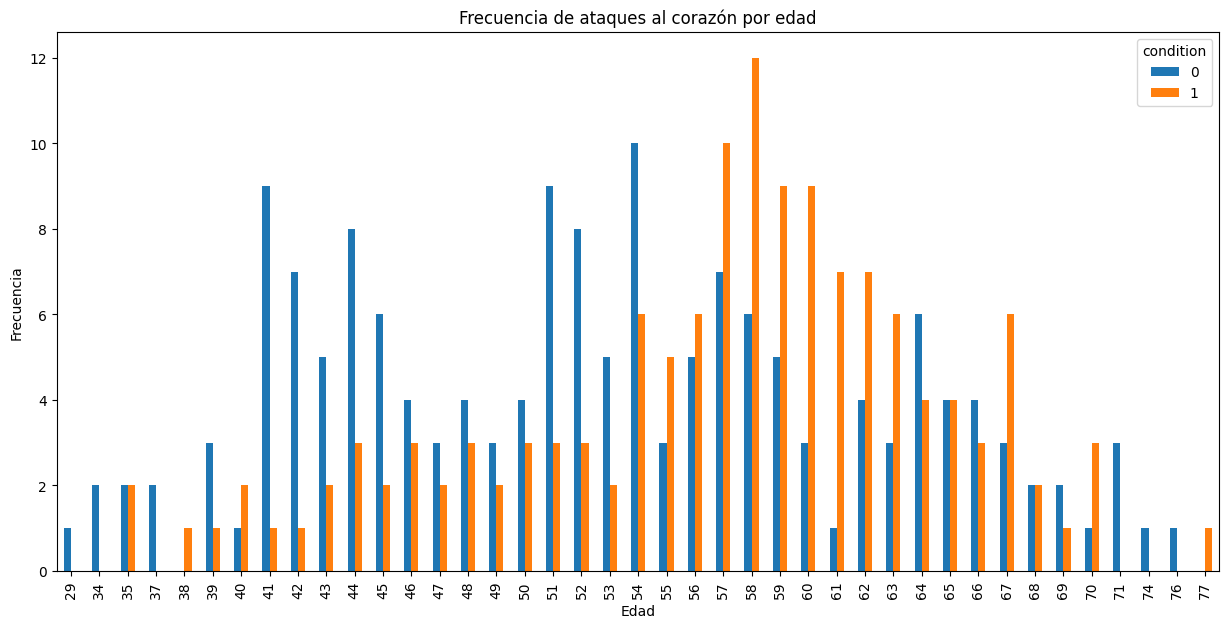

In [18]:
pd.crosstab(df['age'], df['condition']).plot(kind="bar", figsize=(15,7))
plt.title("Frecuencia de ataques al corazón por edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

La mayoría de personas entre los 55 años y 63 años sufren ataques cardíacos

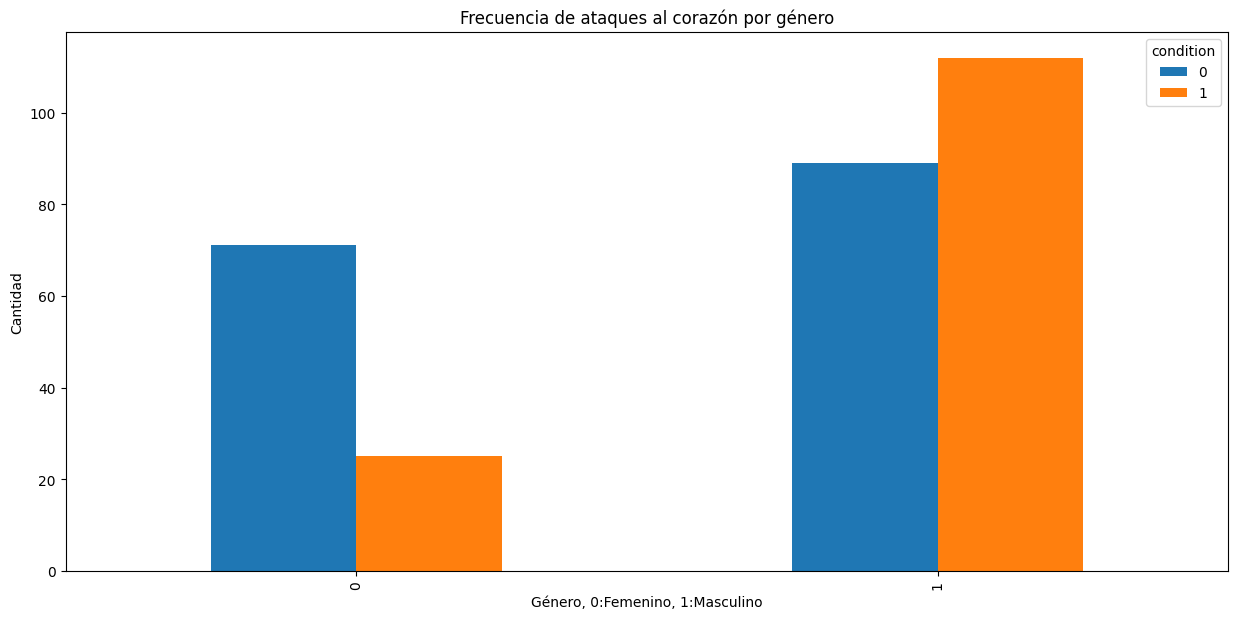

In [22]:
pd.crosstab(df['sex'], df['condition']).plot(kind="bar", figsize=(15,7))
plt.title("Frecuencia de ataques al corazón por género")
plt.xlabel("Género, 0:Femenino, 1:Masculino")
plt.ylabel("Cantidad")
plt.show()

En el caso de género, claramente los hombres son más propropensos a sufrir un ataque al corazón que las mujeres

## Correlaciones

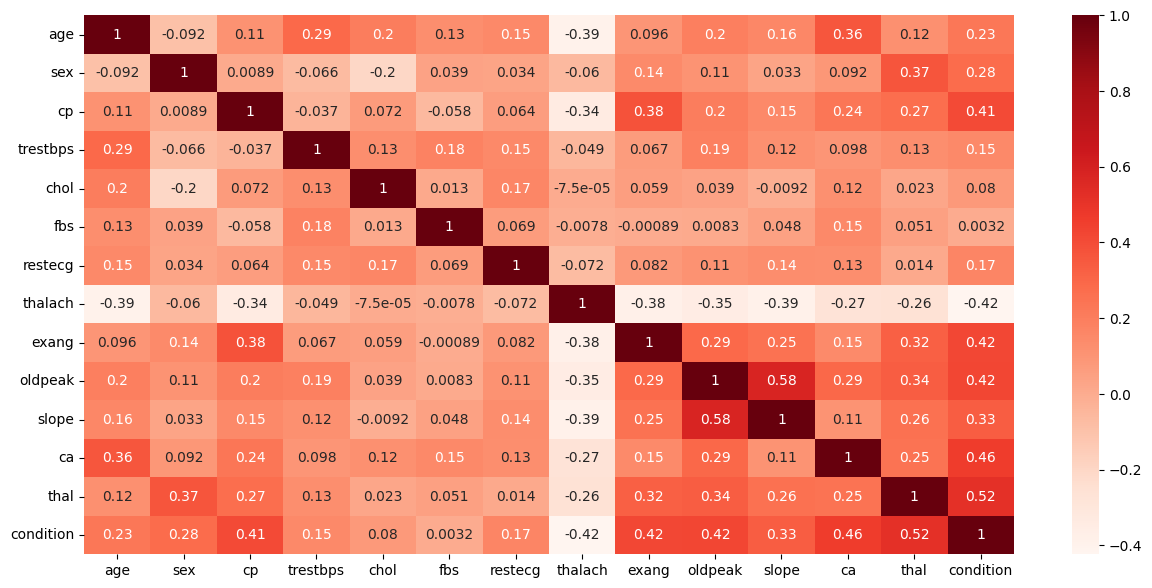

In [28]:
plt.figure(figsize=(15,7))
correlation = (df.corr())
sns.heatmap(correlation,annot=True,cmap='Reds')
plt.show()

## Datos Test y Train

In [24]:
X = df.drop(["condition"], axis=1)
y = df['condition']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2323)

In [30]:
X_train.shape

(237, 13)

In [32]:
X_test.shape

(60, 13)

## Modelo

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
prediccion = lr.predict(X_test)
prediccion

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

## Validación del modelo

In [55]:
print("Precisión del modelo", accuracy_score(y_test,prediccion) * 100, '%')

Precisión del modelo 85.0 %


In [43]:
confusion_matrix(y_test,prediccion)

array([[27,  4],
       [ 5, 24]])

<Axes: >

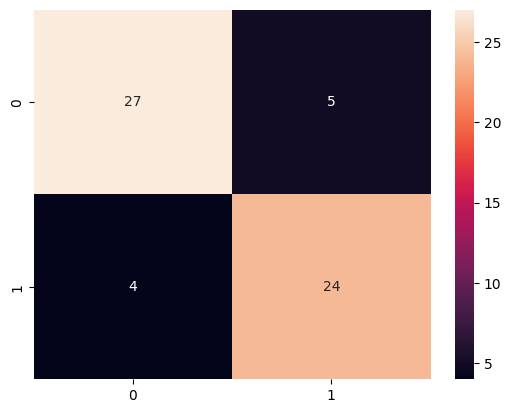

In [44]:
sns.heatmap(confusion_matrix(prediccion,y_test),annot=True)

## Peso de cada variable (Importancia)

Variable: 0, Puntuación: -0.02864
Variable: 1, Puntuación: 0.87671
Variable: 2, Puntuación: 0.32629
Variable: 3, Puntuación: 0.02095
Variable: 4, Puntuación: 0.00046
Variable: 5, Puntuación: -0.41008
Variable: 6, Puntuación: 0.32826
Variable: 7, Puntuación: -0.03378
Variable: 8, Puntuación: 0.71590
Variable: 9, Puntuación: 0.23873
Variable: 10, Puntuación: 0.39410
Variable: 11, Puntuación: 1.09532
Variable: 12, Puntuación: 0.86434


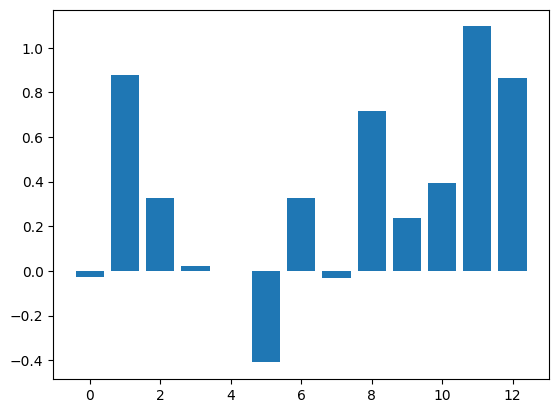

In [47]:
importancia = lr.coef_[0]

for i,v in enumerate(importancia):
	print('Variable: %0d, Puntuación: %.5f' % (i,v))
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [70]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.84        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



## Curva ROC

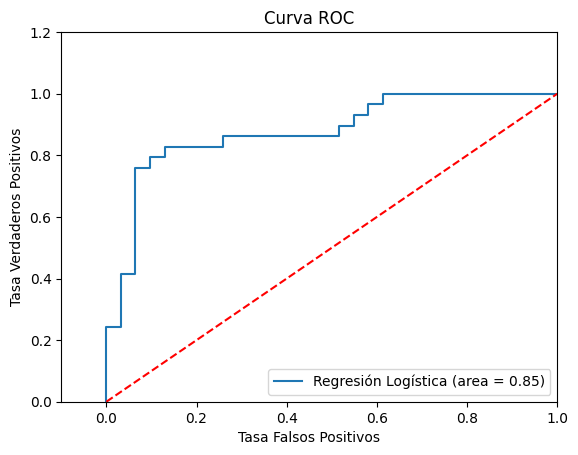

In [67]:
log_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()